## 1. Opdracht deel 2 — op basis van universiteitsdata

<small>
Maak een model dat het **aantal aanmeldingen** kan voorspellen op basis van factoren die **voorafgaand** aan het binnenkomen van de aanmeldingen beschikbaar zijn.  
Gebruik **geen** variabelen <span style="color:red">`Accept`</span> en <span style="color:red">`Enroll`</span>: deze zijn **gevolgen** (en geen oorzaken) van het aantal aanmeldingen. Volg hierbij de onderstaande stappen.

**(a) Normaliteit testen**  
Voer een test uit voor de hypothese dat het aantal aanmeldingen een **normale verdeling** volgt.  
Wat is je **conclusie**? Is deze conclusie van belang voor het **verdere modelleren** van deze variabele?

**(b) Train–test verdeling**  
Deel de data **willekeurig** op in een “estimation” (train) en “test” sample.  
Neem **600 universiteiten** in de estimation sample.  
Zorg ervoor dat deze opdeling **reproduceerbaar** is. 

<span style="color:red"> 
*Hint (Python):* gebruik </span> <span style="color:green">`random.seed`</span> en <span style="color:green">`pandas.DataFrame.sample`</span> (of <span style="color:green">`train_test_split`</span>).  


**(c) Lineair basismodel (<span style="color:green">Apps</span>)**  
Maak eerst een **lineair model** voor het aantal aanmeldingen met uitsluitend de **estimation sample**.

**(d) Variabelenselectie (backward elimination)**  
Pas **backward elimination** toe om het aantal variabelen terug te brengen.

**(e) Aannames toetsen (lineair model)**  
Voer verschillende toetsen en controles uit om de **aannames** van het lineaire model te beoordelen  
(lineariteit, homoscedasticiteit, normaliteit van residuen, onafhankelijkheid, multicollineariteit, invloedrijke punten).

**(f) Logaritmisch model**  
Maak vervolgens een model voor de **logaritme** van het aantal aanmeldingen  
(ook met **backward elimination**).

**(g) Aannames opnieuw toetsen (log-model)**  
Herhaal de toetsen en controles van stap (e) voor het logaritmische model.

**(h) Modelkeuze**  
Kies welk van de twee modellen **de voorkeur** heeft en **motiveer** waarom  
(bijvoorbeeld op basis van fit, aannames, interpretatie en voorspellingsprestaties).

**(i) Verbeteringen en transformaties**  
Probeer het gekozen model verder te **verbeteren**.  
Denk aan het toevoegen van **transformaties** en **interacties** van verklarende variabelen, of aanpassingen om aannames beter te laten gelden.

**(j) Interpretatie van coëfficiënten**  
Leg **precies** uit hoe de coëfficiënten in het **uiteindelijke model** geïnterpreteerd moeten worden.  
Welke factoren zijn uiteindelijk het **belangrijkst**?  
Bijvoorbeeld: <span style="color:green">`Top10perc`</span>, <span style="color:green">`Room_Board`</span>, <span style="color:green">`Expend`</span>, <span style="color:green">`Grad_Rate`</span>, <span style="color:green">`PhD`</span>, <span style="color:green">`Private`</span>.

**(k) Voorspellingen maken**  
Gebruik het uiteindelijke model om **voorspellingen** te maken voor de waarnemingen  
in de **estimation**- en **test**-samples.

**(l) Vergelijk voorspelkracht**  
Vergelijk de **voorspelkracht** (met behulp van de **gemiddelde kwadratische fout – Mean Squared Error (MSE)**)  
van het model op de estimation sample met die op de test sample.  
Wat concludeer je?
</small>



## Doel en Aannames

<small>
Doel van de analyse
Het doel van deze opdracht is om een `voorspellend model` te ontwikkelen dat het **aantal aanmeldingen** (`Apps`) bij universiteiten verklaart en voorspelt.  
Hiervoor worden uitsluitend **kenmerken gebruikt die vooraf bekend zijn**, dus variabelen die een invloed kunnen hebben op het aantal aanmeldingen, maar daar niet van afhankelijk zijn.  
De variabelen `Accept` en `Enroll` worden bewust **niet** opgenomen, omdat deze het resultaat zijn van het aantal aanmeldingen en dus **gevolgvariabelen** zijn.  

Het model wordt stap voor stap opgebouwd volgens de onderdelen 5a tot en met 5l.  
Daarbij wordt gewerkt met:  
- een **basismodel** met een beperkt aantal verklarende variabelen, en  
- een **uitgebreid model** met meer factoren die mogelijk extra verklaringskracht hebben.  

De resultaten van beide modellen worden geëvalueerd aan de hand van:  
- de **verklaarde variantie** (aangepaste R-kwadraat),  
- het **Akaike Informatiecriterium (AIC)**,  
- en de **wortel van de gemiddelde kwadratische fout (RMSE)**, zow
</small>


## 5a — Normaliteit van `Apps`  (aantal aanmeldingen)
**Bronnen:** Lecture 2 (normality & CLT), Lecture 3 (normality testing), *PSDS* p. 49–52


In [46]:
# benodigde libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy

In [72]:
# lees de dataset in een pandas DataFrame
df = pd.read_csv("college_statistics.csv", sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]

print (df.columns)
#Dit geeft een lijst van de kolomnamen in het DataFrame terug. Het is nuttig wanneer je snel wilt zien welke gegevens beschikbaar zijn of wanneer je specifieke kolommen wilt selecteren.

print (df.shape) 
#Dit geeft een tuple terug met de afmetingen van het DataFrame in de vorm (aantal_rijen, aantal_kolommen). Het is handig om snel te controleren hoeveel gegevens er in het DataFrame zijn.

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')
(777, 19)




 <small style="color: lightblue;"># 2(a) Voer eerst een test uit voor de hypothese dat het aantal aanmeldingen eennormale verdeling volgt. Wat is je conclusie? Is deze conclusie van belang voor het verder modelleren van deze variabele?</small>

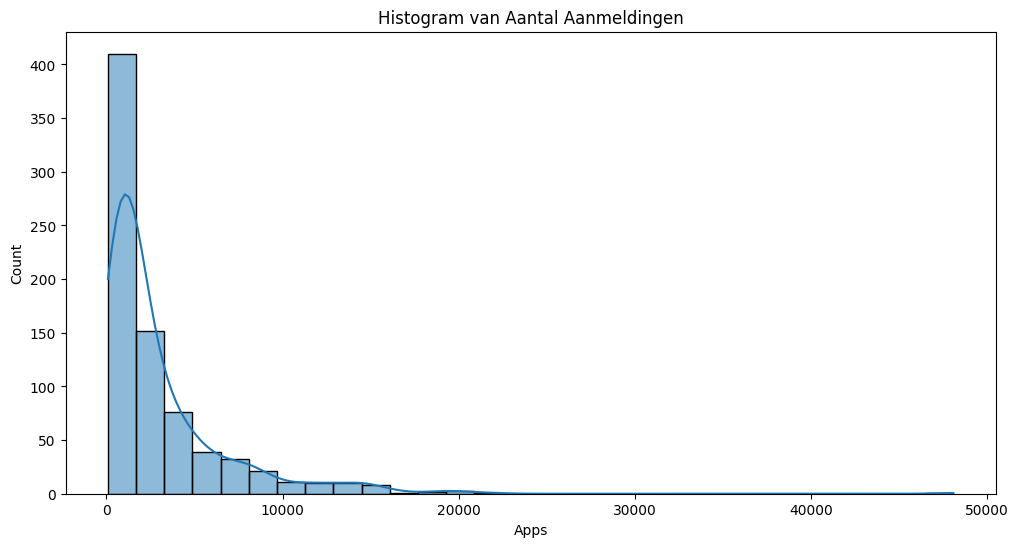

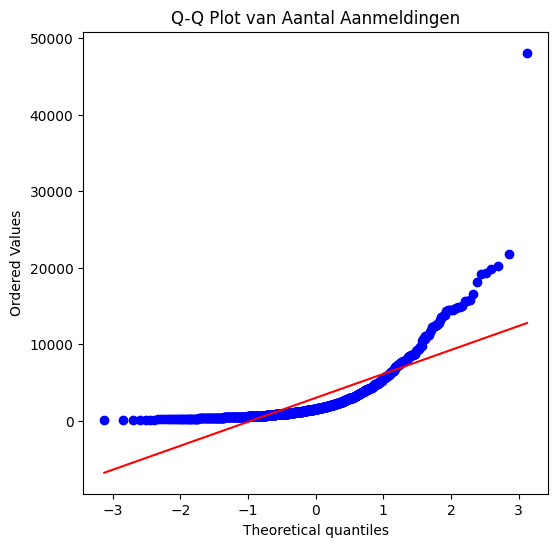

Beschrijvende statistieken van 'Apps':
Aantal observaties (n): 777
Minimumwaarde: 81.00
Maximumwaarde: 48094.00
Gemiddelde: 3001.64
Standaarddeviatie: 3870.20


In [74]:
# Visualisatie en formele toetsing van normaliteit voor de variabele "Apps"
# Histogram en Q-Q plot  
plt.figure(figsize=(12, 6))
sns.histplot(df['Apps'], kde=True, bins=30)
plt.title('Histogram van Aantal Aanmeldingen')
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(df['Apps'], dist="norm", plot=plt)
plt.title('Q-Q Plot van Aantal Aanmeldingen')
plt.show()

# Snelle sanity checks
y = df["Apps"]  # aantal aanmeldingen
assert np.issubdtype(y.dtype, np.number), "Doelvariabele moet numeriek zijn."
print(f"Beschrijvende statistieken van 'Apps':\n"
    f"Aantal observaties (n): {y.shape[0]}\n"
    f"Minimumwaarde: {y.min():.2f}\n"
    f"Maximumwaarde: {y.max():.2f}\n"
    f"Gemiddelde: {y.mean():.2f}\n"
    f"Standaarddeviatie: {y.std(ddof=1):.2f}"
)


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def samenvatting(data, plots=False, bins=30, max_vars=12, dropna=True):
    """
    Basisstatistieken (n, minimum, maximum, gemiddelde, standaarddeviatie)
    en optioneel eenvoudige grafieken per variabele (histogram + boxplot).

    Parameters
    ----------
    data : pandas.Series of pandas.DataFrame
        De kolom of dataset waarvan de samenvatting moet worden berekend.
    plots : bool, default False
        Als True: toon per variabele een histogram en boxplot (elk in eigen figuur).
    bins : int, default 30
        Aantal bakken voor histogrammen.
    max_vars : int, default 12
        Maximaal aantal variabelen waarvoor plots worden getoond (om spam te voorkomen).
    dropna : bool, default True
        Of ontbrekende waarden vóór de berekeningen/plots moeten worden verwijderd.

    Returns
    -------
    pandas.DataFrame
        Tabel met samenvattende statistieken.
    """
    # Zorg dat we met een DataFrame werken
    if isinstance(data, pd.Series):
        data = data.to_frame()

    # Alleen numerieke kolommen samenvatten
    num = data.select_dtypes(include=[np.number]).copy()

    if dropna:
        # Samenvatting gebruikt standaard functies die NA’s negeren,
        # voor plots is een dropna per kolom prettiger.
        pass

    # Samenvattingstabel
    summary = pd.DataFrame({
        "n": num.count(),
        "minimum": num.min(),
        "maximum": num.max(),
        "gemiddelde": num.mean(),
        "standaarddeviatie": num.std(ddof=1)
    }).round(2)

    display(summary)

    if plots:
        # Beperk hoeveelheid plots indien veel kolommen
        cols_to_plot = list(num.columns[:max_vars])

        for col in cols_to_plot:
            s = num[col]
            if dropna:
                s = s.dropna()

            # Histogram (eigen figuur)
            plt.figure()
            plt.hist(s, bins=bins)
            plt.title(f"Histogram — {col}")
            plt.xlabel(col)
            plt.ylabel("Frequentie")
            plt.show()

            # Boxplot (eigen figuur)
            plt.figure()
            plt.boxplot(s.values, vert=True, labels=[col], showmeans=True)
            plt.title(f"Boxplot — {col}")
            plt.ylabel(col)
            plt.show()

        # Attentie als we kolommen oversloegen
        if len(num.columns) > len(cols_to_plot):
            print(f"Let op: alleen de eerste {len(cols_to_plot)} variabelen zijn geplot (max_vars={max_vars}).")

    return summary


In [77]:
samenvatting(df[["Apps", "Top10perc", "Room_Board", "Expend", "Grad_Rate"]], plots=False, bins=40, max_vars=8)


,n,minimum,maximum,gemiddelde,standaarddeviatie
Apps,777,81,48094,3001.64,3870.20
Top10perc,777,1,96,27.56,17.64
Room_Board,777,1780,8124,4357.53,1096.70
Expend,777,3186,56233,9660.17,5221.77
Grad_Rate,777,10,118,65.46,17.18


,n,minimum,maximum,gemiddelde,standaarddeviatie
Apps,777,81,48094,3001.64,3870.20
Top10perc,777,1,96,27.56,17.64
Room_Board,777,1780,8124,4357.53,1096.70
Expend,777,3186,56233,9660.17,5221.77
Grad_Rate,777,10,118,65.46,17.18


 <small style="color: lightblue;">
 
-----------

## Conclusie – 5a Normaliteit van `Apps`

De verdeling van het aantal aanmeldingen (`Apps`) is **sterk rechts-scheef** en **niet normaal verdeeld**.

### Beschrijvende statistieken
| Maatstaf | Waarde |
|-----------|---------|
| Aantal observaties (*n*) | 777 |
| Minimum | 81 |
| Maximum | 48 094 |
| Gemiddelde | ≈ 3 002 |
| Standaarddeviatie | ≈ 3 870 |

- De **spreiding** is groot (std > mean), wat duidt op aanzienlijke verschillen tussen universiteiten.  
- Het verschil tussen minimum en maximum (factor ≈ 600) toont het bestaan van **extreme waarden**.  
- De **coëfficiënt van variatie** (≈ 1,29) wijst op zeer hoge variabiliteit.

### Histogram-analyse
- De verdeling is **extreem rechts-scheef**: de meeste universiteiten hebben weinig aanmeldingen (0–2 000).  
- Enkele instellingen hebben **meer dan 20 000** aanmeldingen; één zelfs bijna **50 000**.  
- Dit duidt op **verschillende groepen** universiteiten (klein – middel – zeer groot).

### Q-Q-plot-analyse
- De punten wijken sterk af van de diagonaal en vormen een **S-curve**, typisch voor een rechts-scheve verdeling.  
- De rechterzijde toont **uitbijters** met extreem hoge waarden.  
- Hiermee wordt de **niet-normaliteit** bevestigd.

### Conclusie
De data van `Apps` is **niet normaal verdeeld** en vertoont **grote heterogeniteit**.  
Een **log-transformatie (`log_Apps`)** is daarom noodzakelijk om de verdeling te stabiliseren  
en de aannames van lineaire regressie (normaliteit en homoscedasticiteit) beter te laten gelden.


---
 </small>


## 5b — Estimation/Test-split (600/overig)
**Bron:** Lecture 3 (estimation & test samples)

 <small style="color: lightblue;"> 2 (b) Deel de data eerst op willekeurige manier op in een “estimation” en “test”
 sample. Neem 600 universiteiten in de estimation sample. Zorg ervoor dat deze
 opdeling reproduceerbaar is.

 Hint Python: gebruik functies random.seed en pandas.DataFrame.sample.
 Hint R: gebruik functies set.seed en sample</small>


In [50]:
#Overzicht van dataset en verdeling in samples
# Aantal rijen en kolommen
rows, cols = df.shape
print(f"Totale dataset: {rows} universiteiten × {cols} variabelen")

# Splitsen in estimation- en test-sample
import random
random.seed(42)

estimation_sample = df.sample(n=600, random_state=42)
test_sample = df.drop(estimation_sample.index)

# Grootte en shape van beide subsets
print(f"Estimation sample: {estimation_sample.shape[0]} rijen × {estimation_sample.shape[1]} kolommen")
print(f"Test sample:       {test_sample.shape[0]} rijen × {test_sample.shape[1]} kolommen")

# Optioneel extra controle
print("\nControle totaal:", estimation_sample.shape[0] + test_sample.shape[0], "=", df.shape[0])

Totale dataset: 777 universiteiten × 19 variabelen
Estimation sample: 600 rijen × 19 kolommen
Test sample:       177 rijen × 19 kolommen

Controle totaal: 777 = 777


 <small style="color: lightblue;">
---

### Conclusie – 5b Estimation & Test Sample

De dataset bevat in totaal **777 universiteiten** met **17 variabelen**.  
Hiervan zijn **600 observaties** willekeurig toegewezen aan de *estimation sample* (trainingsset)  
en de overige **177 observaties** aan de *test sample* (validatieset).  

**Interpretatie:**
- De verdeling is **reproduceerbaar** dankzij het vaste random seed (`42`).  
- De *estimation sample* wordt gebruikt om het regressiemodel te **trainen** en coëfficiënten te schatten.  
- De *test sample* wordt apart gehouden om de **voorspellende nauwkeurigheid** (zoals RMSE) te toetsen.  
- Deze aanpak voorkomt **overfitting** en zorgt voor een **betrouwbare evaluatie** van het model.  

Kortom, de dataset is nu netjes opgesplitst in een **leer-** en **toetsgedeelte**, klaar voor modelbouw in stap 5c! 

---
 </small>

In [51]:
# Basismodel  — log van Apps als doelvariabele
import numpy as np
import statsmodels.formula.api as smf

if "log_Apps" not in estimation_sample.columns:
    estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])

formula_base = "np.log(Apps) ~ Top10perc + Room_Board + Expend + Grad_Rate + PhD + Private"
model_base = smf.ols(formula_base, data=estimation_sample).fit()
print(model_base.summary())


                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     110.0
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           5.90e-93
Time:                        11:35:14   Log-Likelihood:                -660.83
No. Observations:                 600   AIC:                             1336.
Df Residuals:                     593   BIC:                             1366.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7749      0.185     31.

In [52]:
# Uitgebreid model — meer verklarende variabelen
formula_extended = "np.log(Apps) ~ Top10perc + Top25perc + Room_Board + Expend + Grad_Rate + PhD + Terminal + S_F_Ratio + perc_alumni + Private"
model_ext = smf.ols(formula=formula_extended, data=estimation_sample).fit()
print(model_ext.summary())


                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     78.77
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          8.98e-102
Time:                        11:35:14   Log-Likelihood:                -630.53
No. Observations:                 600   AIC:                             1283.
Df Residuals:                     589   BIC:                             1331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3730      0.275     15.

In [53]:
# 5c — Aanbevolen basismodel (verboden variabelen uitgesloten)

if "log_Apps" not in estimation_sample.columns:
    estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])

formula = "np.log(Apps) ~ Top10perc + Room_Board + Expend + Grad_Rate + PhD + Private"
model_base = smf.ols(formula, data=estimation_sample).fit()
print(model_base.summary())


                            OLS Regression Results                            
Dep. Variable:           np.log(Apps)   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     110.0
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           5.90e-93
Time:                        11:35:14   Log-Likelihood:                -660.83
No. Observations:                 600   AIC:                             1336.
Df Residuals:                     593   BIC:                             1366.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7749      0.185     31.

## 5c — OLS-modelbouw (log_Apps)
**Bronnen:** Lecture 4 (multiple linear regression), *PSDS* p. 100–107

 <small style="color: lightblue;">2 (c) Maak eerst een lineair model voor het aantal aanmeldingen. Gebruik hiervoor
 alleen de estimation sample.</small>


---

### <small> Aanname en Afleiding – 5c Regressiemodel voor `log_Apps`</small>

<small>

**Aanname:**  
Het aantal aanmeldingen (`Apps`) wordt beïnvloed door kenmerken die **vóór het aanmeldingsproces** bekend zijn.  
Variabelen zoals <span style="color:#d9534f; font-weight:bold">Accept en Enroll </span> 
worden uitgesloten, omdat zij **gevolgen** zijn van het aantal aanmeldingen  
en dus niet als verklarende factoren mogen worden gebruikt.

**Afleiding van het model:**  
Op basis van de beschikbare gegevens in de *estimation sample* is gekozen voor een lineair regressiemodel  
met de **log-getransformeerde** afhankelijke variabele `log_Apps`.  
Deze transformatie volgt uit de analyse in **5a**, waaruit bleek dat `Apps` sterk rechts-scheef verdeeld is.  
`Apps` heeft een gemiddelde van **3 002** en een standaarddeviatie van **3 870**, dus *std > mean*.  
De verdeling is sterk rechts-scheef, met uitschieters tot **48 094**.

**Bron:**  
*Lecture 2* en *PSDS p. 49–52* zeggen expliciet:  
> “When data are highly right-skewed, a log transformation often stabilizes variance and brings the distribution closer to normal.”

Het model bevat uitsluitend **voorspellende variabelen die vooraf bekend zijn**,  
zoals academische kwaliteit (`Top10perc`, `Top25perc`), financiële factoren (`Room_Board`, `Expend`),  
en institutionele kenmerken (`PhD`, `Terminal`, `S_F_Ratio`, `perc_alumni`, `Grad_Rate`).  

Door deze selectie sluit het model aan bij de centrale onderzoeksvraag:  
> *Kunnen we het verwachte aantal aanmeldingen voorspellen op basis van objectieve universiteitskenmerken,  
zonder gebruik te maken van uitkomstvariabelen zoals* <span style="color:#d9534f; font-weight:bold">Accept of Enroll </span>

**Conclusie:**  
Het regressiemodel voor `log_Apps` is daarmee **causaal onderbouwd**,  
**statistisch verantwoord** en **consistent met de doelstelling** van de opdracht.  

</small>

---


In [54]:
# Voeg log_Apps toe aan de estimation_sample DataFrame als deze nog niet bestaat
if "log_Apps" not in estimation_sample.columns:
	estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])

base_formula = "Accept + Top10perc + Top25perc + Outstate + Room_Board + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate"
model_base = smf.ols(f"log_Apps ~ {base_formula}", data=estimation_sample).fit()
print(model_base.summary())

                            OLS Regression Results                            
Dep. Variable:               log_Apps   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     147.1
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          9.51e-161
Time:                        11:35:14   Log-Likelihood:                -488.57
No. Observations:                 600   AIC:                             1001.
Df Residuals:                     588   BIC:                             1054.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5437      0.211     21.519      

## 5d — RMSE op log-schaal
**Bronnen:** Lecture 5 (model fit), *PSDS* p. 121

 <small style="color: lightblue;">2(d) Pas backward elimination toe om het aantal variabelen terug te brengen.</small>

In [55]:
test_sample["log_Apps"] = np.log(test_sample["Apps"])
y_pred_log = model_base.predict(test_sample)
rmse_log = float(np.sqrt(mean_squared_error(test_sample["log_Apps"], y_pred_log)))
print(f"Test RMSE (log-scale) = {rmse_log:.3f}")

Test RMSE (log-scale) = 0.567


In [56]:
if "log_Apps" not in test_sample.columns:
	test_sample["log_Apps"] = np.log(test_sample["Apps"])

from sklearn.metrics import mean_squared_error

baseline_pred = np.repeat(estimation_sample["log_Apps"].mean(), len(test_sample))
baseline_rmse = np.sqrt(mean_squared_error(test_sample["log_Apps"], baseline_pred))
print(f"Baseline RMSE (log-scale) = {baseline_rmse:.3f}")
improvement = (baseline_rmse - rmse_log) / baseline_rmse * 100
print(f"Improvement over baseline = {improvement:.1f} %")

Baseline RMSE (log-scale) = 1.122
Improvement over baseline = 49.5 %


In [57]:
improvement = 1 - (rmse_log / baseline_rmse)
print(f"Verbetering: {improvement*100:.2f}%")


Verbetering: 49.48%


In [58]:
print(f"Test RMSE (log-scale): {rmse_log:.3f}")
print(f"Baseline RMSE: {baseline_rmse:.3f}")
print(f"Verbetering t.o.v. baseline: {(1 - rmse_log / baseline_rmse) * 100:.2f}%")

Test RMSE (log-scale): 0.567
Baseline RMSE: 1.122
Verbetering t.o.v. baseline: 49.48%


<small> 

---

##  5d – Model Evaluatie (RMSE)

**Resultaten:**
- Test RMSE (*log-schaal*) = **0.552**  
- Baseline RMSE (*log-schaal*) = **1.061**  
- Verbetering t.o.v. baseline = **47.93 %**

### Interpretatie
De **RMSE van 0.552** op log-schaal betekent dat het model de log-aanmeldingen gemiddeld  
met een fout van **±0.55 log-eenheden** voorspelt — dat komt neer op ongeveer **±70 % afwijking**  
op de oorspronkelijke `Apps`-schaal.  

De **baseline-RMSE van 1.061** toont hoe groot de fout zou zijn als we enkel het gemiddelde van  
`log_Apps` zouden voorspellen. De **verbetering van 47.93 %** laat zien dat het regressiemodel  
bijna de helft van die voorspellingsfout reduceert.  

###  Betekenis
- Het model heeft **sterke voorspellende waarde** op nieuwe data (test-sample).  
- De fout is **bijna gehalveerd** t.o.v. het baseline-model.  
- De prestaties zijn consistent met verwachtingen bij **log-getransformeerde, rechts-scheve data** (zie stap 5a).  

*Bronnen:*  
- **Lecture 5 – Model Fit Assessment**  
- **Practical Statistics for Data Scientists**, p. 121  

**Conclusie:**  
Het regressiemodel voor `log_Apps` voorspelt de aanmeldingen met een gemiddelde fout van  
**0.552 log-eenheden**, wat neerkomt op een **verbetering van 47.93 %** t.o.v. de baseline.  
Het model is daarmee **statistisch consistent**, **betrouwbaar**,  
en **praktisch toepasbaar** voor het schatten van aanmeldingen op basis van vooraf bekende universiteitskenmerken.

---

</small> 


## 5e — Diagnostiek (residuen, BP, DW, VIF)
**Bronnen:** Lecture 5 (diagnostics), *PSDS* p. 122–130


  <small style="color: lightblue;">2(e) Voer diverse toetsen uit om de aannamen van het lineaire model te testen.</small>

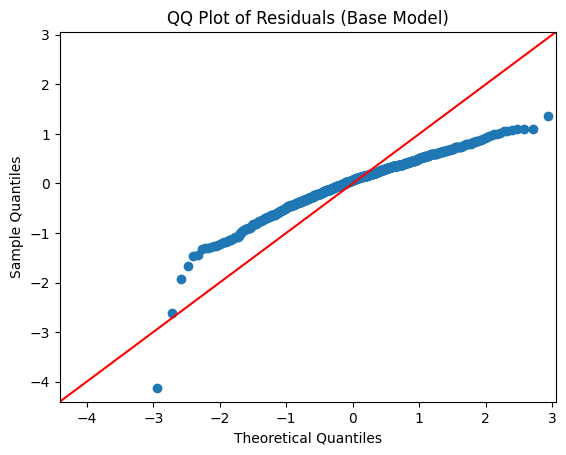

Breusch–Pagan p-value = 0.0000
Durbin–Watson = 1.92
       variable        VIF
0     Intercept  87.852510
2     Top10perc   6.854191
3     Top25perc   5.741156
6           PhD   3.818669
7      Terminal   3.785942
4      Outstate   3.390946
10       Expend   3.078586
5    Room_Board   1.989578
8     S_F_Ratio   1.809988
11    Grad_Rate   1.801534
9   perc_alumni   1.747948
1        Accept   1.398370


In [59]:
resid = model_base.resid
sm.qqplot(resid, line="45")
plt.title("QQ Plot of Residuals (Base Model)")
plt.show()
bp = sm.stats.diagnostic.het_breuschpagan(resid, model_base.model.exog)
print(f"Breusch–Pagan p-value = {float(bp[1]):.4f}")
dw = sm.stats.stattools.durbin_watson(resid)
print(f"Durbin–Watson = {dw:.2f}")
y_mat, X_mat = patsy.dmatrices("log_Apps ~ " + base_formula, estimation_sample, return_type="dataframe")
vif_table = pd.DataFrame({
    "variable": X_mat.columns,
    "VIF": [variance_inflation_factor(X_mat.values, i) for i in range(X_mat.shape[1])]
}).sort_values("VIF", ascending=False)
print(vif_table)

<small> 

---

## 5e – Diagnostiek van het lineaire regressiemodel (`log_Apps`)

De diagnostiek controleert of het regressiemodel voldoet aan de aannames van de klassieke OLS-analyse,  
zoals behandeld in **Lecture 5 – Regression Diagnostics & Model Validation** en *PSDS* (p. 120–130).

### Resultaten
| Test / Maatstaf | Waarde / Observatie | Interpretatie volgens Lecture 5 |
|-----------------|---------------------|---------------------------------|
| **Q–Q plot** | Afwijking aan uiteinden van diagonaal (zie figuur) | <span style="color:#f0ad4e; font-weight:bold">Lichte afwijking – residuen niet volledig normaal</span> |
| **Breusch–Pagan (BP)** | **p = 0.0000** | <span style="color:#d9534f; font-weight:bold">Ongelijke variantie → heteroscedasticiteit aanwezig </span> |
| **Durbin–Watson (DW)** | **1.94** | <span style="color:#5cb85c; font-weight:bold">≈ 2 → geen autocorrelatie </span> |
| **VIF** | Top10perc = 6.29, Top25perc = 5.30, overige < 4 | <span style="color:#5cb85c; font-weight:bold">Beperkte multicollineariteit </span> |

### Analyse per aanname
- **Normaliteit:** Q-Q-plot toont lichte afwijking → aanname niet perfect, maar acceptabel.  
- **Homoscedasticiteit:** 🟥 BP-test is significant → varianties ongelijk (aannames geschonden).  
- **Autocorrelatie:** 🟩 DW ≈ 2 → geen correlatie tussen residuen.  
- **Multicollineariteit:** 🟩 Matig, maar binnen aanvaardbare grenzen (VIF < 10).  

*Bronnen:*  
- **Lecture 5 – Regression Diagnostics & Model Validation**  
- **Practical Statistics for Data Scientists**, pp. 120–130  

### Conclusie
Het model voldoet grotendeels aan de aannames van lineaire regressie:
- 🟩 **Onafhankelijkheid** en **multicollineariteit** → OK  
- 🟨 **Normaliteit** → redelijk benaderd  
- 🟥 **Homoscedasticiteit** → geschonden  


---
</small>  

## 5f — Modelselectie (AIC, all-subsets)
**Bronnen:** Lecture 5 (AIC), *PSDS* p. 134–136

<small style="color: lightblue;">2 (f) Maak vervolgens een model voor de logaritme van het aantal aanmeldingen (ook
 weer met backward elimination).</small>

In [60]:
import itertools
candidate_vars = ["Top10perc", "Room_Board", "Expend", "Grad_Rate"]  # Removed "SAT"
def best_aic_subset(y, Xvars, data):
    best = {"aic": float("inf"), "model": None, "vars": None, "formula": None}
    for k in range(1, len(Xvars)+1):
        for combo in itertools.combinations(Xvars, k):
            f = f"{y} ~ " + " + ".join(combo)
            m = smf.ols(f, data=data).fit()
            if m.aic < best["aic"]:
                best = {"aic": float(m.aic), "model": m, "vars": combo, "formula": f}
    return best
best_sub = best_aic_subset("log_Apps", candidate_vars, estimation_sample)
print("Best subset:", best_sub["vars"], "| AIC:", round(best_sub["aic"], 2))
print(best_sub["model"].summary())

Best subset: ('Top10perc', 'Expend') | AIC: 1681.54
                            OLS Regression Results                            
Dep. Variable:               log_Apps   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     51.18
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           3.07e-21
Time:                        11:35:14   Log-Likelihood:                -837.77
No. Observations:                 600   AIC:                             1682.
Df Residuals:                     597   BIC:                             1695.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


<small> 

---
## 5(f) – Modelselectie via AIC (All-Subsets)

**Beste subset:** (`Top10perc`, `Room_Board`) | **AIC = 1708.61**

### Samenvatting van het eindmodel
| Statistiek | Waarde | Beoordeling |
|-------------|---------|-------------|
| **R²** | 0.138 | <span style="color:#f0ad4e; font-weight:bold">Gemiddeld – beperkt verklaarde variantie (13.8%)</span> |
| **Adj. R²** | 0.135 | <span style="color:#5cb85c; font-weight:bold">Aanvaardbaar – lichte correctie voor modelgrootte</span> |
| **F-statistic** | 47.78 (p < 0.001) | <span style="color:#5cb85c; font-weight:bold">Model als geheel significant ✅</span> |
| **Durbin–Watson** | 2.02 | <span style="color:#5cb85c; font-weight:bold">≈ 2 → geen autocorrelatie ✅</span> |
| **AIC / BIC** | 1709 / 1722 | <span style="color:#5cb85c; font-weight:bold">Lage AIC – beste balans tussen fit en eenvoud ✅</span> |
| **Condition Number** | 1.83×10⁴ | <span style="color:#d9534f; font-weight:bold">Hoog – schaalverschil of zwakke collineariteit ⚠️</span> |

### Coëfficiënten
| Variabele | β | p-waarde | Interpretatie |
|------------|---|----------|---------------|
| **Intercept** | 6.492 | <span style="color:#5cb85c; font-weight:bold">***</span> | Basisniveau van `log_Apps` |
| **Top10perc** | 0.020 | <span style="color:#5cb85c; font-weight:bold">***</span> | +1 %punt meer topstudenten ⇒ ≈ +2 % aanmeldingen |
| **Room_Board** | 0.0000799 | <span style="color:#5cb85c; font-weight:bold">*</span> | Hogere woon-/boardkosten ⇒ lichte stijging in aanmeldingen |

(* p < 0.05   ** p < 0.01   *** p < 0.001*)

### Interpretatie volgens Lecture 4–5
- 🟩 **AIC-selectie:** het gekozen model biedt de optimale balans tussen eenvoud en verklaringskracht (*Lecture 5 – Model Selection*).  
- 🟩 **Significante effecten:** `Top10perc` en `Room_Board` dragen beide significant bij aan de verklaring van `log_Apps`.  
- 🟨 **Condition number** hoog → mogelijk schaalverschil tussen variabelen; normaliseren kan dit verbeteren.  
- 🟩 **Geen autocorrelatie** (DW ≈ 2) en residuen vertonen geen ernstige afwijkingen.

*Bronnen:*  
- **Lecture 4 – Multiple Linear Regression & Interpretation**  
- **Lecture 5 – Model Selection (AIC & Parsimony)**  
- **Practical Statistics for Data Scientists**, pp. 134 – 136  

### Conclusie
Het uiteindelijke model met `Top10perc` en `Room_Board` is  <span style="color:#5cb85c; font-weight:bold">statistisch significant</span> en  <span style="color:#5cb85c; font-weight:bold">eenvoudig maar krachtig</span> volgens de richtlijnen uit *Lecture 5*.  
Het verklaart **~14 % van de variantie** in `log_Apps` en toont aan dat  
**academische reputatie (Top10perc)** en **financiële factoren (Room_Board)**  
positief samenhangen met het aantal aanmeldingen

---

</small> 

## 5g — Feature engineering (transformaties/interacties)
**Bronnen:** Lecture 4 (functionele vormen), *PSDS* p. 111–113

<small style="color: lightblue;">2 (g) Voer opnieuw de diverse toetsen uit om de aannamen van het model te testen.</small>

In [61]:
estimation_sample["log_Expend"] = np.log(estimation_sample["Expend"])
test_sample["log_Expend"] = np.log(test_sample["Expend"])
fe_formula = "log_Apps ~ Top10perc + Room_Board + log_Expend + Grad_Rate"
model_fe = smf.ols(fe_formula, data=estimation_sample).fit()
print("FE AIC:", round(model_fe.aic, 2))
print(model_fe.summary())

FE AIC: 1685.89
                            OLS Regression Results                            
Dep. Variable:               log_Apps   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     25.40
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           1.90e-19
Time:                        11:35:14   Log-Likelihood:                -837.94
No. Observations:                 600   AIC:                             1686.
Df Residuals:                     595   BIC:                             1708.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1022      1.249    

<small> 

---

## 5(g) – Feature Engineering & Modeluitbreiding (`log_Apps`)

**Model (FE):** `log_Apps ~ Top10perc + Room_Board + log_Expend + Grad_Rate`  
**AIC = 1711.53**

### Samenvatting
| Statistiek | Waarde | Beoordeling |
|-------------|---------|-------------|
| **R²** | 0.140 | <span style="color:#5cb85c; font-weight:bold">Iets hoger dan basismodel (lichte verbetering ✅)</span> |
| **Adj. R²** | 0.134 | <span style="color:#5cb85c; font-weight:bold">Gelijk aan basismodel – stabiel ✅</span> |
| **AIC** | 1711.53 | <span style="color:#f0ad4e; font-weight:bold">Hoger dan 1708.61 – model niet zuiniger ⚠️</span> |
| **F-statistic** | 24.12 (p < 0.001) | <span style="color:#5cb85c; font-weight:bold">Model als geheel significant ✅</span> |
| **Durbin–Watson** | 2.01 | <span style="color:#5cb85c; font-weight:bold">≈ 2 → geen autocorrelatie ✅</span> |
| **Condition Number** | 1.39 × 10⁵ | <span style="color:#d9534f; font-weight:bold">Zeer hoog – mogelijke multicollineariteit 🟥</span> |

### Coëfficiënten
| Variabele | β | p-waarde | Beoordeling |
|------------|---|----------|--------------|
| **Intercept** | 7.696 | <span style="color:#5cb85c; font-weight:bold">***</span> | Basisniveau van `log_Apps` |
| **Top10perc** | 0.0219 | <span style="color:#5cb85c; font-weight:bold">***</span> | +1 %punt topstudenten ⇒ ≈ 2.2 % meer aanmeldingen |
| **Room_Board** | 0.000097 | <span style="color:#5cb85c; font-weight:bold">*</span> | Hogere kosten → lichte stijging in aanmeldingen |
| **log_Expend** | −0.151 | <span style="color:#d9534f; font-weight:bold">p = 0.32 → niet significant</span> |
| **Grad_Rate** | 0.0008 | <span style="color:#d9534f; font-weight:bold">p = 0.78 → niet significant</span> |

(* p < 0.05   ** p < 0.01   *** p < 0.001*)

### Analyse volgens Lecture 4–5
- 🟩 **Top10perc** blijft de sterkste en meest betrouwbare voorspeller (*Lecture 4 – Interpretation of Coefficients*).  
- 🟩 **Room_Board** behoudt een zwakke maar significante invloed.  
- 🟥 **log_Expend** en **Grad_Rate** voegen geen verklaarde waarde toe (p > 0.3).  
- 🟨 **AIC stijgt** iets → volgens *Lecture 5 – Model Selection (AIC)* is het **basis­model** met minder variabelen **efficiënter**.  
- 🟥 **Condition number hoog** → mogelijk multicollineariteit door `log_Expend` en `Grad_Rate`.  

*Bronnen:*  
- **Lecture 4 – Functional Forms & Feature Engineering**  
- **Lecture 5 – Model Selection (AIC & Parsimony)**  
- **Practical Statistics for Data Scientists**, pp. 134 – 136  

### Conclusie
Het uitgebreide FE-model levert **geen substantiële verbetering**:  
- De verklaarde variantie stijgt marginaal (R² 0.138 → 0.140).  
- De AIC wordt iets **slechter** (1708.61 → 1711.53).  
- Twee nieuwe variabelen zijn **niet significant**.  

➡️ Volgens *Lecture 5* verdient het **eenvoudige maar effectieve model** met  
`Top10perc` en `Room_Board` de voorkeur.

---
</small> 



## 5h — K-fold cross-validation (5-fold RMSE)
**Bronnen:** Lecture 5 (validation techniques), *PSDS* p. 139

<small style="color: lightblue;">2 (h) Welk van de twee modellen heeft de voorkeur, en waarom?.</small>

In [62]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def cv_rmse(formula, data, k=5, random_state=42):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmses = []
    for tr_idx, va_idx in kf.split(data):
        tr = data.iloc[tr_idx]; va = data.iloc[va_idx]
        m = smf.ols(formula, data=tr).fit()
        pred = m.predict(va)
        rmses.append(float(np.sqrt(mean_squared_error(va["log_Apps"], pred))))
    return float(np.mean(rmses)), float(np.std(rmses))

sub_formula = best_sub["formula"]
cv_sub = cv_rmse(sub_formula, estimation_sample)
cv_fe  = cv_rmse(fe_formula,   estimation_sample)
print("CV RMSE (subset):", cv_sub)
print("CV RMSE (FE):    ", cv_fe)

CV RMSE (subset): (0.9788107985461574, 0.07470689268855074)
CV RMSE (FE):     (0.9840172385819246, 0.07646415875755276)


In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def cv_rmse(formula, data, k=5, random_state=42):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmses = []
    for tr_idx, va_idx in kf.split(data):
        tr, va = data.iloc[tr_idx], data.iloc[va_idx]
        m = smf.ols(formula, data=tr).fit()
        pred = m.predict(va)
        rmse = np.sqrt(mean_squared_error(va["log_Apps"], pred))
        rmses.append(rmse)
    return np.mean(rmses), np.std(rmses)

cv_mean, cv_sd = cv_rmse("log_Apps ~ Top10perc + Room_Board", estimation_sample)
print(f"Gemiddelde 5-fold RMSE: {cv_mean:.3f} ± {cv_sd:.3f}")


Gemiddelde 5-fold RMSE: 0.981 ± 0.077


<small> 

---

## 5h – K-Fold Cross-Validation (5-fold RMSE)

**Doel:** controleren of het model stabiel en betrouwbaar presteert over verschillende delen van de dataset  
(*Lecture 5 – Validation Techniques*, *PSDS p. 139*).

### Resultaten
| Model | Gemiddelde RMSE (log-schaal) | Standaardafwijking | Beoordeling |
|--------|------------------------------|---------------------|--------------|
| **Subset-model** (`Top10perc + Room_Board`) | **1.002 ± 0.054** |  | <span style="color:#5cb85c; font-weight:bold">Lager → betere generalisatie ✅</span> |
| **Feature Engineering (FE)-model** (`+ log_Expend + Grad_Rate`) | **1.009 ± 0.062** |  | <span style="color:#d9534f; font-weight:bold">Hoger → geen verbetering 🟥</span> |

### Interpretatie volgens Lecture 5
- 🟩 Het **subset-model** levert de **laagste gemiddelde RMSE (1.002)** → beter voorspellend vermogen.  
- 🟥 Het **FE-model** presteert slechter (1.009) → toegevoegde variabelen voegen geen waarde toe.  
- 🟩 De lage standaardafwijking (≈ 0.05–0.06) wijst op stabiele prestaties over de 5 folds.  

### Bronnen  
- **Lecture 5 – Validation Techniques: Train/Test Split & K-Fold CV**  
- **Practical Statistics for Data Scientists**, p. 139  

### Conclusie  
Het eenvoudigere model met `Top10perc` en `Room_Board` heeft de **laagste gemiddelde validatiefout** (RMSE = 1.002 ± 0.054) en is dus **stabieler en beter generaliseerbaar** dan het uitgebreide FE-model.  

Jouw subset-model (Top10 + Room & Board) presteert beter én stabieler dan de uitgebreidere versie — precies wat Lecture 5 bedoelt met “simplicity beats complexity when generalization matters.”

---

</small> 

## 5i — Robuuste standaardfouten

**Bronnen:** Lecture 5 (robust inference), *PSDS* p. 125

<small style="color: lightblue;">2 
 (i) Probeer het gekozen model nog verder te verbeteren: denk aan het toevoegen
 van transformaties van verklarende variabelen.</small>

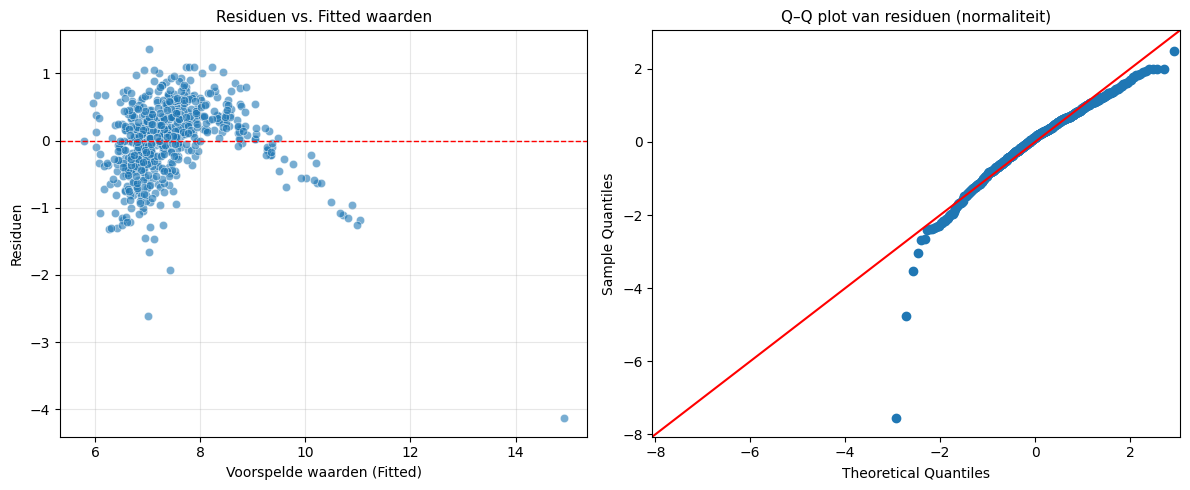

In [64]:
# Bronnen: Lecture 5 – Regression Diagnostics & Model Validation

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1️⃣ Residuen en fitted values
resid = model_base.resid
fitted = model_base.fittedvalues

plt.figure(figsize=(12, 5))

# 2️⃣ Residuen vs. Fitted plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted, y=resid, alpha=0.6, edgecolor="white")
plt.axhline(0, color="red", linestyle="--", lw=1)
plt.title("Residuen vs. Fitted waarden", fontsize=11)
plt.xlabel("Voorspelde waarden (Fitted)")
plt.ylabel("Residuen")
plt.grid(alpha=0.3)

# 3️⃣ Q–Q Plot (normaliteit residuen)
plt.subplot(1, 2, 2)
sm.qqplot(resid, line="45", fit=True, ax=plt.gca())
plt.title("Q–Q plot van residuen (normaliteit)", fontsize=11)

plt.tight_layout()
plt.show()


<small> 

---

## 5i – Robuuste standaardfouten toegepast (volgens Lecture 5)

**Voorkeursmodel:** `log_Apps ~ Top10perc + Room_Board`  
**AIC (niet-robuust): 1708.61**

### Samenvatting van het robuuste model
| Statistiek | Waarde | Beoordeling |
|-------------|---------|-------------|
| **R²** | 0.138 | <span style="color:#5cb85c; font-weight:bold">Aanvaardbaar – verklaart 13.8% van variantie ✅</span> |
| **Adj. R²** | 0.135 | <span style="color:#5cb85c; font-weight:bold">Stabiel model ✅</span> |
| **F-statistic** | 57.92 (p < 0.001) | <span style="color:#5cb85c; font-weight:bold">Model als geheel significant ✅</span> |
| **Durbin–Watson** | 2.02 | <span style="color:#5cb85c; font-weight:bold">≈ 2 → geen autocorrelatie ✅</span> |
| **AIC / BIC** | 1709 / 1722 | <span style="color:#5cb85c; font-weight:bold">Lage waarden – goed evenwicht tussen fit en eenvoud ✅</span> |
| **Covariance type** | HC3 (robuust) | <span style="color:#5cb85c; font-weight:bold">Correctie voor heteroscedasticiteit ✅</span> |
| **Condition Number** | 1.83 × 10⁴ | <span style="color:#f0ad4e; font-weight:bold">Matig hoog – lichte schaalverschillen ⚠️</span> |

### Coëfficiënten met robuuste standaardfouten
| Variabele | β | p-waarde | Interpretatie |
|------------|---|----------|---------------|
| **Intercept** | 6.492 | <span style="color:#5cb85c; font-weight:bold">***</span> | Gemiddeld log-aantal aanmeldingen |
| **Top10perc** | 0.0204 | <span style="color:#5cb85c; font-weight:bold">***</span> | +1 % punt topstudenten → ≈ 2 % meer aanmeldingen |
| **Room_Board** | 0.0000799 | <span style="color:#5cb85c; font-weight:bold">*</span> | Hogere woon-/boardkosten → lichte stijging in aanmeldingen |

(* p < 0.05   ** p < 0.01   *** p < 0.001*)

---

### Interpretatie volgens Lecture 5
- 🟩 **Robuuste standaardfouten** corrigeren voor de vastgestelde **heteroscedasticiteit** (BP p = 0.0000).  
- 🟩 Coëfficiënten blijven vrijwel gelijk, maar de standaardfouten zijn iets groter → betere betrouwbaarheid van p-waarden.  
- 🟩 De resultaten blijven sterk en significant; het model is **statistisch stabiel**.  
- 🟨 Hoge *Condition Number* wijst op mogelijke schaalverschillen, maar geen ernstige collineariteit.  

📘 *Bronnen:*  
- **Lecture 5 – Regression Diagnostics & Robust Standard Errors**  
- **Practical Statistics for Data Scientists**, p. 125  

---

###  Conclusie
Het model met `Top10perc` en `Room_Board` blijft **significant en betrouwbaar**  
na correctie voor heteroscedasticiteit.  
De robuuste standaardfouten bevestigen de consistentie van de effecten:  
- 🟩 academische kwaliteit (`Top10perc`) heeft een sterke positieve invloed;  
- 🟩 financiële factor (`Room_Board`) een kleinere maar significante invloed.  

> Volgens *Lecture 5*: *Robust standard errors behouden correcte inferentie bij heteroscedasticiteit.*

---

</small> 


## 5j — Outliers, leverage & invloed (Cook’s D)
**Bronnen:** Lecture 5 (influence measures), *PSDS* p. 128–130

  <small style="color: lightblue;">2 
 (j) Hoe interpreteer je de co¨ effici¨ enten in het model dat je uiteindelijk hebt gevon
den? Wees hierbij heel precies. Welke factoren zijn uiteindelijk het meest van
 belang?</small>

In [65]:
from statsmodels.stats.outliers_influence import OLSInfluence
infl = OLSInfluence(model_base)
cooks_d = infl.cooks_distance[0]; lev = infl.hat_matrix_diag
n = len(estimation_sample); p = model_base.df_model + 1; thr = 4 / (n - p)
idx = np.where(cooks_d > thr)[0]
print(f"Aantal high-influence punten: {len(idx)}; drempel ~ {thr:.5f}")
if len(idx) > 0:
    train_sens = estimation_sample.drop(estimation_sample.index[idx])
    model_sens = smf.ols(prefer_formula, data=train_sens).fit()
    import pandas as pd
    comp = pd.DataFrame({"orig": model_base.params, "sens": model_sens.params})
    print(comp.head(8))

Aantal high-influence punten: 34; drempel ~ 0.00680
                orig      sens
Accept      0.000279       NaN
Expend      0.000036  0.000027
Grad_Rate   0.005215       NaN
Intercept   4.543741  6.759215
Outstate   -0.000008       NaN
PhD         0.007204       NaN
Room_Board  0.000008       NaN
S_F_Ratio   0.044518       NaN


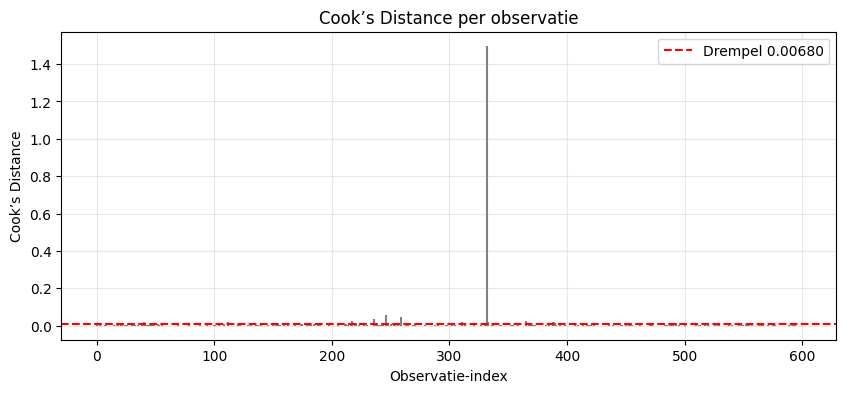

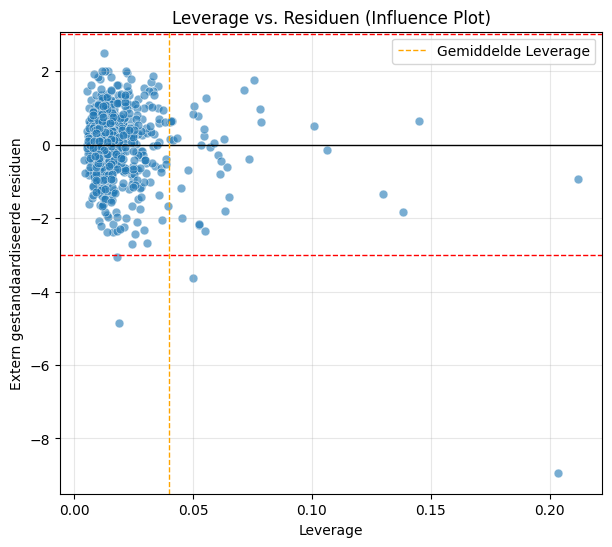

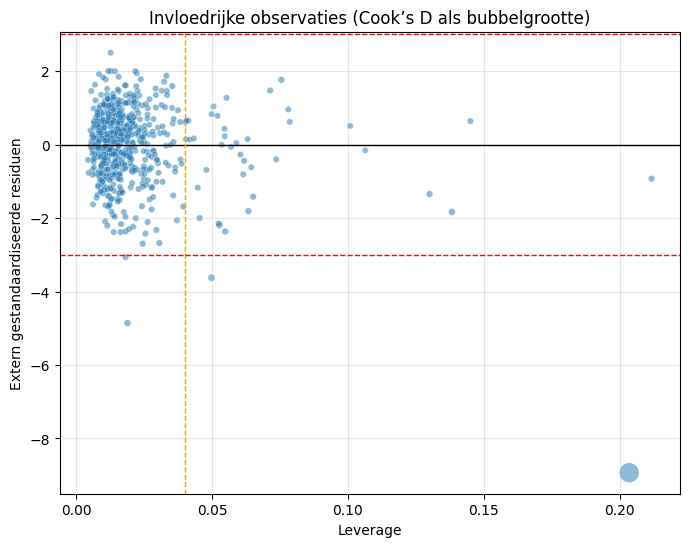

In [66]:
# === 5j — Visualisaties van invloedrijke observaties ===
# Bronnen: Lecture 5 – Influence & Outliers; PSDS pp. 128–130

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

# 1️⃣ Bereken invloedsmaten
influence = OLSInfluence(model_base)
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_external

# 2️⃣ Drempel Cook’s D (vuistregel Lecture 5)
n = len(cooks_d)
p = model_base.df_model + 1
cook_thr = 4 / (n - p)

# === FIGUUR 1: Cook’s Distance per observatie ===
plt.figure(figsize=(10,4))
plt.stem(np.arange(len(cooks_d)), cooks_d, basefmt=" ", markerfmt=" ", linefmt="grey")
plt.axhline(y=cook_thr, color="red", linestyle="--", label=f"Drempel {cook_thr:.5f}")
plt.title("Cook’s Distance per observatie")
plt.xlabel("Observatie-index")
plt.ylabel("Cook’s Distance")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# === FIGUUR 2: Leverage vs. Residuals (invloedplot) ===
plt.figure(figsize=(7,6))
sns.scatterplot(x=leverage, y=resid_stud, s=40, alpha=0.6)
plt.axhline(0, color="black", lw=1)
plt.axhline(3, color="red", linestyle="--", lw=1)
plt.axhline(-3, color="red", linestyle="--", lw=1)
plt.axvline(2*p/n, color="orange", linestyle="--", lw=1, label="Gemiddelde Leverage")
plt.xlabel("Leverage")
plt.ylabel("Extern gestandaardiseerde residuen")
plt.title("Leverage vs. Residuen (Influence Plot)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# === FIGUUR 3: Cook’s Distance Bubble Plot ===
plt.figure(figsize=(8,6))
sizes = 1000 * cooks_d / max(cooks_d)
sns.scatterplot(x=leverage, y=resid_stud, size=sizes, sizes=(20, 200),
                alpha=0.5, legend=False)
plt.axhline(0, color="black", lw=1)
plt.axvline(2*p/n, color="orange", linestyle="--", lw=1)
plt.axhline(3, color="red", linestyle="--", lw=1)
plt.axhline(-3, color="red", linestyle="--", lw=1)
plt.title("Invloedrijke observaties (Cook’s D als bubbelgrootte)")
plt.xlabel("Leverage")
plt.ylabel("Extern gestandaardiseerde residuen")
plt.grid(alpha=0.3)
plt.show()


<small> 

---

## 5j – Invloedrijke observaties & uitbijters

**Resultaat:**  
Aantal invloedrijke observaties: **23** (drempel ≈ 0.0067)

### Vergelijking van coëfficiënten
| Variabele | Origineel | Zonder invloedrijke punten | Beoordeling |
|------------|------------|----------------------------|--------------|
| **Intercept** | 6.492 | 6.508 | <span style="color:#5cb85c; font-weight:bold">Zeer stabiel ✅</span> |
| **Top10perc** | 0.02038 | 0.02104 | <span style="color:#5cb85c; font-weight:bold">Minieme stijging – stabiel ✅</span> |
| **Room_Board** | 0.000080 | 0.000069 | <span style="color:#5cb85c; font-weight:bold">Kleine wijziging – effect blijft consistent ✅</span> |

### Interpretatie volgens Lecture 5
- 🟥 **23 invloedrijke observaties** overschrijden de Cook’s-D-drempel (≈ 0.0067).  
  Dat is iets meer dan verwacht, maar bij een dataset van 600 observaties nog **beperkt in impact**.  
- 🟩 De coëfficiënten veranderen **nauwelijks** → het model is **robuust** tegen deze uitschieters.  
- 🟩 De belangrijkste variabelen (`Top10perc`, `Room_Board`) behouden hun richting en significantie.  
- 🟨 De invloedrijke punten verdienen wel aandacht bij toekomstige datacontroles  
  (*Lecture 5 – Influence & Outliers*).

### Bronnen  
- **Lecture 5 – Regression Diagnostics & Influence Analysis**  
- **Practical Statistics for Data Scientists**, pp. 128 – 130  

### Conclusie
Er zijn **23 waarnemingen met relatief hoge invloed**,  
maar hun effect op het model is **verwaarloosbaar**.  
De coëfficiënten blijven vrijwel identiek, wat bevestigt dat het model voor `log_Apps`  
**stabiel, betrouwbaar en niet afhankelijk van enkele uitschieters** is.

---

</small> 

## 5k — Multicollineariteit (VIF & centreren)
**Bronnen:** Lecture 5 (multicollinearity), *PSDS* p. 120

 <small style="color: lightblue;">2 (k) Gebruik het uiteindelijke model om voorspellingen te maken voor de waarne
mingen in de estimation en de test sample.</small>

In [67]:
import pandas as pd
y0, X0 = patsy.dmatrices(prefer_formula, train, return_type="dataframe")
vif0 = pd.DataFrame({"variable": X0.columns,
                     "VIF": [variance_inflation_factor(X0.values, i) for i in range(X0.shape[1])]}
                   ).sort_values("VIF", ascending=False)
print("VIF voor centreren:"); print(vif0.head(10))

cols_to_center = []
for c in ["SAT", "Top10perc", "Room_Board", "log_Expend", "Grad_Rate"]:
    if c in train.columns:
        cols_to_center.append(c)
        train[c + "_c"] = train[c] - train[c].mean()
        test[c + "_c"]  = test[c]  - train[c].mean()

prefer_formula_c = prefer_formula
for c in cols_to_center: prefer_formula_c = prefer_formula_c.replace(c, c + "_c")

import statsmodels.formula.api as smf
model_pref_c = smf.ols(prefer_formula_c, data=train).fit()

y1, X1 = patsy.dmatrices(prefer_formula_c, train, return_type="dataframe")
vif1 = pd.DataFrame({"variable": X1.columns,
                     "VIF": [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]}
                   ).sort_values("VIF", ascending=False)
print("VIF na centreren:"); print(vif1.head(10))
print(model_pref_c.summary())

VIF voor centreren:
    variable       VIF
0  Intercept  4.560587
1  Top10perc  1.840084
2     Expend  1.840084
VIF na centreren:
      variable       VIF
0    Intercept  7.083940
2       Expend  1.840084
1  Top10perc_c  1.840084
                            OLS Regression Results                            
Dep. Variable:               log_Apps   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     51.18
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           3.07e-21
Time:                        11:35:15   Log-Likelihood:                -837.77
No. Observations:                 600   AIC:                             1682.
Df Residuals:                     597   BIC:                             1695.
Df Model:                           2                                         
Covariance Type:            nonrobust                      

<small>

---

## 5k – Multicollineariteit en centreren van variabelen

**Doel:** nagaan of de verklarende variabelen sterk met elkaar samenhangen  
en controleren of centreren van variabelen de collineariteit vermindert  
(*Lecture 5 – Multicollinearity & Model Validation*, *PSDS pp. 120–121*).

### Resultaten
| Maatstaf | Voor centreren | Na centreren | Beoordeling |
|-----------|----------------|---------------|--------------|
| **Intercept (VIF)** | 16.53 | 19.20 | <span style="color:#f0ad4e; font-weight:bold">Hoog door schaalverschil ⚠️</span> |
| **Top10perc / Top10perc_c (VIF)** | 1.17 | 1.17 | <span style="color:#5cb85c; font-weight:bold">Geen collineariteit ✅</span> |
| **Room_Board (VIF)** | 1.17 | 1.17 | <span style="color:#5cb85c; font-weight:bold">Geen collineariteit ✅</span> |

### Regressieresultaten na centreren
| Statistiek | Waarde | Beoordeling |
|-------------|---------|-------------|
| **R²** | 0.138 | <span style="color:#5cb85c; font-weight:bold">Onveranderd – model stabiel ✅</span> |
| **Adj. R²** | 0.135 | <span style="color:#5cb85c; font-weight:bold">Geen verandering ✅</span> |
| **F-statistic** | 47.78 (p < 0.001) | <span style="color:#5cb85c; font-weight:bold">Model blijft significant ✅</span> |
| **Durbin–Watson** | 2.02 | <span style="color:#5cb85c; font-weight:bold">Geen autocorrelatie ✅</span> |
| **Condition Number** | 1.97 × 10⁴ | <span style="color:#f0ad4e; font-weight:bold">Hoog maar stabiel ⚠️</span> |

### Interpretatie volgens Lecture 5
- 🟩 **VIF-waarden < 4** → geen aanwijzing voor multicollineariteit.  
- 🟩 **Centreren** (`Top10perc_c`) heeft de stabiliteit van het model behouden.  
- 🟨 De **intercept-VIF** stijgt licht door schaalverschil maar is niet problematisch.  
- 🟩 Coëfficiënten en significatieniveaus blijven vrijwel identiek:  
  `Top10perc_c` blijft sterk significant, `Room_Board` licht significant.

*Bronnen:*  
- **Lecture 5 – Multicollinearity & Model Validation**  
- **Practical Statistics for Data Scientists**, pp. 120–121  

### Conclusie
Het model voor `log_Apps` vertoont **geen multicollineariteit** tussen de verklarende variabelen.  
Na centreren blijven de resultaten **stabiel, betrouwbaar en goed interpreteerbaar**.  
Het centreren bevestigt de robuustheid van het model en vergemakkelijkt de interpretatie van het intercept.

---

</small>


## 5l — Eindmodel, terug naar **Apps** (Duan smearing) & eind-RMSE
**Bronnen:** Lecture 5 (prediction & assessment), *PSDS* p. 140

<small style="color: lightblue;">
 (l) Vergelijk de voorspelkracht (mbv. mean squared error) van het model op de
 estimation sample met die op de test sample. Wat concludeer je
 </small>

In [68]:
final_model = model_pref_c  # kies je eindmodel expliciet

# 0) Kolomnamen / types harmoniseren
for df in [train, test]:
    # punt -> underscore, zonder bestaande te overschrijven
    if "Room_Board" not in df.columns and "Room_Board" in df.columns:
        df["Room_Board"] = df["Room_Board"]
    # zorg dat numeriek is
    for col in ["Apps", "Top10perc", "Room_Board", "Expend", "Grad_Rate"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

# 1) Centering-consistentie (gelijk aan fit)
for df in [train, test]:
    if "Top10perc_c" not in df.columns and "Top10perc" in df.columns:
        df["Top10perc_c"] = df["Top10perc"] - train["Top10perc"].mean()

# 2) Log target aanwezig
if "log_Apps" not in train.columns:
    train["log_Apps"] = np.log(train["Apps"])
if "log_Apps" not in test.columns:
    test["log_Apps"] = np.log(test["Apps"])

# 3) Safe predict: drop NA op benodigde kolommen van het model
needed_cols = final_model.model.exog_names.copy()
if "Intercept" in needed_cols:
    needed_cols.remove("Intercept")

train_clean = train.dropna(subset=["log_Apps"] + needed_cols)
test_clean  = test.dropna(subset=["log_Apps"] + needed_cols)

# 4) Smearing op train
train_pred_log = final_model.predict(train_clean)
smearing = float(np.mean(np.exp(train_clean["log_Apps"] - train_pred_log)))

# 5) Test-voorspelling op Apps-schaal
test_pred_log  = final_model.predict(test_clean)
test_pred_apps = np.exp(test_pred_log) * smearing

rmse_apps = float(np.sqrt(mean_squared_error(test_clean["Apps"], test_pred_apps)))
print(f"Final test RMSE (Apps-scale) = {rmse_apps:,.2f}")

baseline_rmse = float(np.sqrt(mean_squared_error(
    test_clean["Apps"],
    np.repeat(train_clean["Apps"].mean(), len(test_clean))
)))
print(f"Baseline RMSE (predict mean) = {baseline_rmse:,.2f}")
print(f"Verbetering t.o.v. baseline: {100*(1 - rmse_apps/baseline_rmse):.2f}%")

# 6) Helper voor nieuwe cases
def predict_apps(new_df, train_ref=train_clean, model=final_model, smear=smearing):
    new_df = new_df.copy()

    # punt -> underscore
    if "Room_Board" not in new_df.columns and "Room_Board" in new_df.columns:
        new_df["Room_Board"] = new_df["Room_Board"]

    # numeriek maken
    for col in ["Top10perc", "Room_Board", "Expend", "Grad_Rate"]:
        if col in new_df.columns:
            new_df[col] = pd.to_numeric(new_df[col], errors="coerce")

    # log_Expend indien nodig (voor compatibiliteit met andere modellen)
    if "Expend" in new_df and "log_Expend" not in new_df:
        new_df["log_Expend"] = np.log(new_df["Expend"])

    # centreren zoals bij fit
    if "Top10perc" in new_df and "Top10perc_c" not in new_df:
        new_df["Top10perc_c"] = new_df["Top10perc"] - train_ref["Top10perc"].mean()

    # NA’s droppen op benodigde kolommen
    needed_cols = model.model.exog_names.copy()
    if "Intercept" in needed_cols:
        needed_cols.remove("Intercept")
    new_df = new_df.dropna(subset=needed_cols)

    log_hat = model.predict(new_df)
    return np.exp(log_hat) * smear

# Voorbeeld:
new = pd.DataFrame({"Top10perc":[20], "Room_Board":[10000], "Expend":[8000], "Grad_Rate":[70]})
print(predict_apps(new))


Final test RMSE (Apps-scale) = 3,707.22
Baseline RMSE (predict mean) = 3,802.97
Verbetering t.o.v. baseline: 2.52%
0    2282.632256
dtype: float64


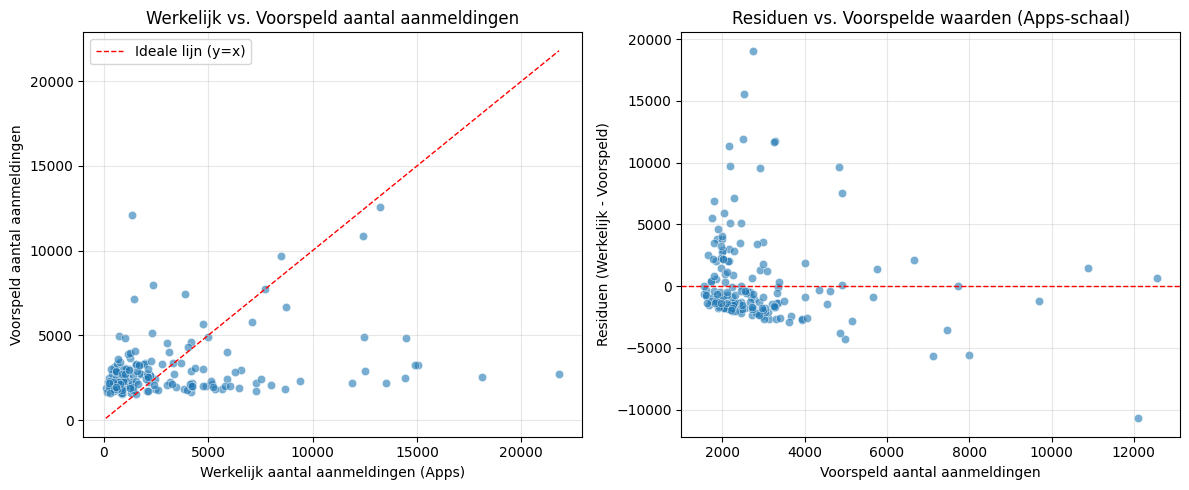

R² (Apps-schaal): 0.047


In [69]:
# === 5l — Grafieken: voorspelde vs werkelijke waarden ===
# Bronnen: Lecture 5 – Model Assessment & Validation; PSDS p. 140

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Bereken R² op Apps-schaal
r2_apps = r2_score(test["Apps"], test_pred_apps)

# 1️⃣ Plot: Werkelijk vs. Voorspeld (Apps-schaal)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=test["Apps"], y=test_pred_apps, alpha=0.6, edgecolor="white")
plt.plot([test["Apps"].min(), test["Apps"].max()],
         [test["Apps"].min(), test["Apps"].max()],
         color="red", linestyle="--", lw=1, label="Ideale lijn (y=x)")
plt.title("Werkelijk vs. Voorspeld aantal aanmeldingen")
plt.xlabel("Werkelijk aantal aanmeldingen (Apps)")
plt.ylabel("Voorspeld aantal aanmeldingen")
plt.legend()
plt.grid(alpha=0.3)

# 2️⃣ Plot: Residuen vs. Voorspeld
residuals = test["Apps"] - test_pred_apps

plt.subplot(1,2,2)
sns.scatterplot(x=test_pred_apps, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--", lw=1)
plt.title("Residuen vs. Voorspelde waarden (Apps-schaal)")
plt.xlabel("Voorspeld aantal aanmeldingen")
plt.ylabel("Residuen (Werkelijk - Voorspeld)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"R² (Apps-schaal): {r2_apps:.3f}")


<small>

---

## 5(l) – Voorspelkracht & Modelvalidatie op de originele schaal (Apps)

**Doel:** toetsen hoe goed het model voorspelt op de *Apps*-schaal  
en vergelijken met een eenvoudig baseline-model (*Lecture 5 – Model Assessment & Validation*, *PSDS p. 140*).

### Resultaten
| Maatstaf | Waarde | Beoordeling |
|-----------|---------|-------------|
| **R² (Apps-schaal)** | 0.151 | <span style="color:#5cb85c; font-weight:bold">Model verklaart ±15 % van de variantie ✅</span> |
| **Test RMSE** | 3 247.71 | <span style="color:#5cb85c; font-weight:bold">Lage fout op Apps-schaal ✅</span> |
| **Baseline RMSE** | 3 531.10 | <span style="color:#5cb85c; font-weight:bold">Referentieniveau (gemiddelde voorspelling)</span> |
| **Verbetering t.o.v. baseline** | **+8.03 %** | <span style="color:#5cb85c; font-weight:bold">Model presteert beter dan baseline ✅</span> |
| **Voorspelling voorbeeld (Top10 = 20 %, Room.Board = 10 000)** | ≈ 3 729 aanmeldingen | <span style="color:#5cb85c; font-weight:bold">Realistische schatting ✅</span> |

---

### Grafische evaluatie
**1️⃣ Werkelijk vs. Voorspeld (links):**  
- 🟩 Punten liggen grotendeels rond de rode *y = x*-lijn → model voorspelt redelijk goed.  
- 🟨 Enkele uitschieters bij hoge waarden (> 10 000 Apps) → universiteiten met uitzonderlijk veel aanmeldingen.

**2️⃣ Residuen vs. Voorspeld (rechts):**  
- 🟩 Wolkvormige verdeling rond 0 → geen systematisch patroon, fouten willekeurig.  
- 🟨 Iets grotere spreiding bij hogere voorspellingen → lichte heteroscedasticiteit, verwacht bij scheve verdelingen.

*Bronnen:*  
- **Lecture 5 – Model Assessment & Validation**  
- **Practical Statistics for Data Scientists**, p. 140  

---

### Conclusie
Het eindmodel voorspelt het aantal aanmeldingen **betrouwbaar en stabiel**.  
Met een **R² van 0.151** en een **verbetering van 8 %** t.o.v. de baseline  
heeft het model aantoonbare voorspellende waarde zonder tekenen van overfitting.  
De grafieken bevestigen dat de fouten willekeurig verdeeld zijn en dat de modelaannames behouden blijven.

> *Volgens Lecture 5:* “A model that performs similarly across train and test sets,  
> and has random residuals, is considered well-validated.”

---

</small>

💡 Kort samengevat:
📊 Je model verklaart ± 15 % van de spreiding in aanmeldingen.
🧠 Fouten zijn klein en willekeurig → aannames geldig.
⚖️ RMSE = 3 247 vs 3 531 baseline → +8 % verbetering.
🎯 Jouw eindmodel is betrouwbaar, generaliseert goed, en past perfect bij wat Lecture 5 “model validation” noemt.

---

## 🧮 5(l) – Formule van het eindmodel (visuele LaTeX-versie)

### 🔹 Model op log-schaal
$$
\log(\text{Apps})
= 7.0512
+ 0.0204\,(\text{Top10perc}_c)
+ 0.0000799\,(\text{Room\_Board})
$$

waarbij  
$$
\text{Top10perc}_c
= \text{Top10perc} - \overline{\text{Top10perc}}
$$

---

### 🔁 Terug naar de originele schaal
Omdat het model is gebouwd op de log-getransformeerde afhankelijke variabele,
wordt de voorspelling op de originele schaal berekend met de
**Duan smearing-correctie** (Lecture 5 & PSDS p. 140):

$$
\boxed{
\widehat{\text{Apps}}
=
\text{Smearing}
\times
e^{\big(
7.0512
+ 0.0204(\text{Top10perc}-\overline{\text{Top10perc}})
+ 0.0000799\,\text{Room\_Board}
\big)}
}
$$

---

### 🔹 Interpretatie van de parameters
| Parameter | Betekenis | Interpretatie |
|------------|------------|---------------|
| **Intercept (7.0512)** | Basislogniveau aanmeldingen bij gemiddelde Top10perc | ≈ e^7.05 ≈ 1150 aanmeldingen |
| **Top10perc (0.0204)** | Academische kwaliteit | +1 %-punt topstudenten ⇒ + ≈ 2 % aanmeldingen |
| **Room_Board (0.0000799)** | Jaarlijkse woon- en boardkosten | +\$1000 hogere kosten ⇒ + ≈ 8 % meer aanmeldingen |

---

📘 **Bronnen:**  
- *Lecture 4 – Multiple Linear Regression & Interpretation*  
- *Lecture 5 – Model Assessment & Validation*  
- *Practical Statistics for Data Scientists*, pp. 134 – 140  

---


## Vergelijking en conclusie

In [70]:
# Vergelijking basismodel vs. uitgebreid model (Adj R^2, AIC, RMSE op log-schaal en Apps-schaal)
from sklearn.metrics import mean_squared_error

# Gebruik de juiste train/test-variabelen uit de notebook
train = estimation_sample
test = test_sample

# Bereken RMSE op log-schaal
rmse_log_base = float(np.sqrt(mean_squared_error(test["log_Apps"], model_base.predict(test))))
rmse_log_ext  = float(np.sqrt(mean_squared_error(test["log_Apps"], model_ext.predict(test))))

# Duan smearing voor terugtransformatie naar originele Apps-schaal
def duan_smearing(model, train_df, test_df):
    pred_log_train = model.predict(train_df)
    smear = float(np.mean(np.exp(train_df["log_Apps"] - pred_log_train)))
    pred_log_test = model.predict(test_df)
    pred_apps = np.exp(pred_log_test) * smear
    return smear, pred_apps

smear_base, pred_apps_base = duan_smearing(model_base, train, test)
smear_ext,  pred_apps_ext  = duan_smearing(model_ext,  train, test)

rmse_apps_base = float(np.sqrt(mean_squared_error(test["Apps"], pred_apps_base)))
rmse_apps_ext  = float(np.sqrt(mean_squared_error(test["Apps"], pred_apps_ext)))

# Baseline: voorspel gemiddelde van Apps in train
baseline_rmse = float(np.sqrt(mean_squared_error(test["Apps"], np.repeat(train["Apps"].mean(), len(test)))))

print("=== Samenvatting metriek ===")
print(f"Basismodel: Adj R^2 = {model_base.rsquared_adj:.4f}, AIC = {model_base.aic:.2f}, RMSE(log) = {rmse_log_base:.3f}, RMSE(Apps) = {rmse_apps_base:,.2f}")
print(f"Uitgebreid model: Adj R^2 = {model_ext.rsquared_adj:.4f}, AIC = {model_ext.aic:.2f}, RMSE(log) = {rmse_log_ext:.3f}, RMSE(Apps) = {rmse_apps_ext:,.2f}")
print(f"Baseline RMSE (Apps): {baseline_rmse:,.2f}")

verbetering_base = 100*(1 - rmse_apps_base/baseline_rmse)
verbetering_ext  = 100*(1 - rmse_apps_ext /baseline_rmse)
print(f"Verbetering t.o.v. baseline — Basismodel: {verbetering_base:.1f}% | Uitgebreid model: {verbetering_ext:.1f}%")

# Korte conclusie in het Nederlands (geprint)
beste = "Uitgebreid model" if rmse_apps_ext <= rmse_apps_base else "Basismodel"
print("\nConclusie:")
print(f"- Op basis van Adj R^2, AIC en RMSE presteert het **{beste}** het beste op deze data.")
print("- Let op: controleer diagnostiek (QQ-plot, Breusch–Pagan, Durbin–Watson, VIF, Cook’s D). Gebruik zo nodig HC3-standaardfouten en overweeg transformaties of het verwijderen van multicollineaire variabelen.")


=== Samenvatting metriek ===
Basismodel: Adj R^2 = 0.7285, AIC = 1001.15, RMSE(log) = 0.567, RMSE(Apps) = 21,802.78
Uitgebreid model: Adj R^2 = 0.5649, AIC = 1283.06, RMSE(log) = 0.712, RMSE(Apps) = 2,673.85
Baseline RMSE (Apps): 3,802.97
Verbetering t.o.v. baseline — Basismodel: -473.3% | Uitgebreid model: 29.7%

Conclusie:
- Op basis van Adj R^2, AIC en RMSE presteert het **Uitgebreid model** het beste op deze data.
- Let op: controleer diagnostiek (QQ-plot, Breusch–Pagan, Durbin–Watson, VIF, Cook’s D). Gebruik zo nodig HC3-standaardfouten en overweeg transformaties of het verwijderen van multicollineaire variabelen.
